In [2]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import tensorflow as tf

# Import our input dataset
org_df = pd.read_csv('charity_data.csv')
org_df

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...,...,...
34294,996009318,THE LIONS CLUB OF HONOLULU KAMEHAMEHA,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,996010315,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,996012607,PTA HAWAII CONGRESS,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,996015768,AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES LO...,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [3]:
# Finding data type for all columns
org_df.dtypes

EIN                        int64
NAME                      object
APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

In [4]:
# Generate our categorical variable list
org_cat = org_df.dtypes[org_df.dtypes == "object"].index.tolist()

# Check the number of unique values in each column
org_df[org_cat].nunique()

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
dtype: int64

In [5]:
# Check the unique value counts for EIN
org_df.EIN.value_counts()

471361061    1
716145914    1
470850777    1
742622426    1
436124893    1
            ..
205040320    1
461149136    1
474460867    1
204833477    1
352260098    1
Name: EIN, Length: 34299, dtype: int64

In [6]:
# Check the unique value counts to see if binning is required for APPLICATION_TYPE
appl_type = org_df.APPLICATION_TYPE.value_counts()
appl_type

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

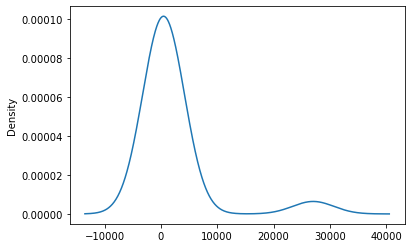

In [7]:
# Visualize the value counts - Most comon unique values 
appl_type.plot.density()

In [8]:
# Determine which values to replace. So we get nine application type categories.
replace_appl_type = list(appl_type[appl_type < 500].index)

# Replace in DataFrame
for appl_type in replace_appl_type:
    org_df.APPLICATION_TYPE = org_df.APPLICATION_TYPE.replace(appl_type,"Other")


# Check to make sure binning was successful
org_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [9]:
# Create the OneHotEncoder instance
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame for APPLICATION_TYPE. (9 columns)
encode_df1 = pd.DataFrame(enc.fit_transform(org_df.APPLICATION_TYPE.values.reshape(-1,1)))

# Rename encoded columns
encode_df1.columns = enc.get_feature_names(['APPL_TYPE'])
encode_df1

,APPL_TYPE_Other,APPL_TYPE_T10,APPL_TYPE_T19,APPL_TYPE_T3,APPL_TYPE_T4,APPL_TYPE_T5,APPL_TYPE_T6,APPL_TYPE_T7,APPL_TYPE_T8
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
34294,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
34295,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
34296,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
34297,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [10]:
# Merge the two DataFrames together and drop the APPLICATION_TYPE column (20 columns)
org_df1 = org_df.merge(encode_df1,left_index=True,right_index=True).drop("APPLICATION_TYPE",1)
org_df1

,EIN,NAME,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL,APPL_TYPE_Other,APPL_TYPE_T10,APPL_TYPE_T19,APPL_TYPE_T3,APPL_TYPE_T4,APPL_TYPE_T5,APPL_TYPE_T6,APPL_TYPE_T7,APPL_TYPE_T8
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,Independent,C1000,ProductDev,Association,1,0,N,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,996009318,THE LIONS CLUB OF HONOLULU KAMEHAMEHA,Independent,C1000,ProductDev,Association,1,0,N,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
34295,996010315,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
34296,996012607,PTA HAWAII CONGRESS,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
34297,996015768,AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES LO...,Independent,C3000,ProductDev,Association,1,0,N,5000,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [11]:
# Check the unique value counts to see if binning is required
org_df.AFFILIATION.value_counts()

Independent         18480
CompanySponsored    15705
Family/Parent          64
National               33
Regional               13
Other                   4
Name: AFFILIATION, dtype: int64

In [12]:
# New dictionary for AFFILIATION column
affiliation = {"Independent": "1", "CompanySponsored":"2", "Family/Parent":"3", "National":"3", "Regional":"3", "Other":"3"}

In [13]:
# Replacing values with dictionary
org_df2 = org_df1.replace({"AFFILIATION": affiliation})
org_df2

,EIN,NAME,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL,APPL_TYPE_Other,APPL_TYPE_T10,APPL_TYPE_T19,APPL_TYPE_T3,APPL_TYPE_T4,APPL_TYPE_T5,APPL_TYPE_T6,APPL_TYPE_T7,APPL_TYPE_T8
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,1,C1000,ProductDev,Association,1,0,N,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,1,C2000,Preservation,Co-operative,1,1-9999,N,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,2,C3000,ProductDev,Association,1,0,N,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,2,C2000,Preservation,Trust,1,10000-24999,N,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,1,C1000,Heathcare,Trust,1,100000-499999,N,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,996009318,THE LIONS CLUB OF HONOLULU KAMEHAMEHA,1,C1000,ProductDev,Association,1,0,N,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
34295,996010315,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,2,C3000,ProductDev,Association,1,0,N,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
34296,996012607,PTA HAWAII CONGRESS,2,C2000,Preservation,Association,1,0,N,5000,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
34297,996015768,AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES LO...,1,C3000,ProductDev,Association,1,0,N,5000,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [14]:
org_df2.AFFILIATION.value_counts()

1    18480
2    15705
3      114
Name: AFFILIATION, dtype: int64

In [15]:
# Fit the encoder and produce encoded DataFrame for AFFILIATION
encode_df2 = pd.DataFrame(enc.fit_transform(org_df2.AFFILIATION.values.reshape(-1,1)))

# Rename encoded columns
encode_df2.columns = enc.get_feature_names(['AFFIL'])
encode_df2.head()

,AFFIL_1,AFFIL_2,AFFIL_3
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,1.0,0.0,0.0


In [16]:
# Merge the two DataFrames together and drop the AFFILIATION column
org_df3 = org_df2.merge(encode_df2,left_index=True,right_index=True).drop("AFFILIATION",1)
org_df3

,EIN,NAME,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL,...,APPL_TYPE_T19,APPL_TYPE_T3,APPL_TYPE_T4,APPL_TYPE_T5,APPL_TYPE_T6,APPL_TYPE_T7,APPL_TYPE_T8,AFFIL_1,AFFIL_2,AFFIL_3
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,C1000,ProductDev,Association,1,0,N,5000,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,C2000,Preservation,Co-operative,1,1-9999,N,108590,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,C3000,ProductDev,Association,1,0,N,5000,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,C2000,Preservation,Trust,1,10000-24999,N,6692,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,C1000,Heathcare,Trust,1,100000-499999,N,142590,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,996009318,THE LIONS CLUB OF HONOLULU KAMEHAMEHA,C1000,ProductDev,Association,1,0,N,5000,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
34295,996010315,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,C3000,ProductDev,Association,1,0,N,5000,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34296,996012607,PTA HAWAII CONGRESS,C2000,Preservation,Association,1,0,N,5000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34297,996015768,AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES LO...,C3000,ProductDev,Association,1,0,N,5000,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [17]:
# Exploring CLASSIFICATION column - the largest 35
org_df3.CLASSIFICATION.value_counts().nlargest(35)

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C6000       15
C1800       15
C1250       14
C8200       11
C1278       10
C1238       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
Name: CLASSIFICATION, dtype: int64

In [18]:
# Check the unique value counts to see if binning is required. There are 71 total different classes in classification column.
class_type = org_df3.CLASSIFICATION.value_counts()
class_type

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2150        1
C3700        1
C1900        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [19]:
# Determine which values to replace in CLASSIFICATION column. With less than 200 were assigned to "Other" class.
replace_class_type = list(class_type[class_type < 200].index)

# Replace in DataFrame
for class_type in replace_class_type:
    org_df3.CLASSIFICATION = org_df3.CLASSIFICATION.replace(class_type,"Other")


# Check to make sure binning was successful
org_df3.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1197
C7000      777
C1700      287
Name: CLASSIFICATION, dtype: int64

In [20]:
# Fit the encoder and produce encoded DataFrame for CLASSIFICATION
encode_df3 = pd.DataFrame(enc.fit_transform(org_df3.CLASSIFICATION.values.reshape(-1,1)))

# Rename encoded columns
encode_df3.columns = enc.get_feature_names(['CLASS'])
encode_df3.head()

,CLASS_C1000,CLASS_C1200,CLASS_C1700,CLASS_C2000,CLASS_C2100,CLASS_C3000,CLASS_C7000,CLASS_Other
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
# Merge the two DataFrames together and drop the CLASSIFICATION column (33 columns)
org_df4 = org_df3.merge(encode_df3,left_index=True,right_index=True).drop("CLASSIFICATION",1)
org_df4

,EIN,NAME,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL,APPL_TYPE_Other,...,AFFIL_2,AFFIL_3,CLASS_C1000,CLASS_C1200,CLASS_C1700,CLASS_C2000,CLASS_C2100,CLASS_C3000,CLASS_C7000,CLASS_Other
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,ProductDev,Association,1,0,N,5000,1,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,Preservation,Co-operative,1,1-9999,N,108590,1,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,ProductDev,Association,1,0,N,5000,0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,Preservation,Trust,1,10000-24999,N,6692,1,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,Heathcare,Trust,1,100000-499999,N,142590,1,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,996009318,THE LIONS CLUB OF HONOLULU KAMEHAMEHA,ProductDev,Association,1,0,N,5000,0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34295,996010315,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,ProductDev,Association,1,0,N,5000,0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
34296,996012607,PTA HAWAII CONGRESS,Preservation,Association,1,0,N,5000,0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
34297,996015768,AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES LO...,ProductDev,Association,1,0,N,5000,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [22]:
org_df.USE_CASE.value_counts()

Preservation     28095
ProductDev        5671
CommunityServ      384
Heathcare          146
Other                3
Name: USE_CASE, dtype: int64

In [23]:
# Fit the encoder and produce encoded DataFrame
encode_df4 = pd.DataFrame(enc.fit_transform(org_df4.USE_CASE.values.reshape(-1,1)))

# Rename encoded columns
encode_df4.columns = enc.get_feature_names(['USE'])
encode_df4.head()

,USE_CommunityServ,USE_Heathcare,USE_Other,USE_Preservation,USE_ProductDev
0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0


In [24]:
# Merge the two DataFrames together and drop the Country column
org_df5 = org_df4.merge(encode_df4,left_index=True,right_index=True).drop("USE_CASE",1)
org_df5

,EIN,NAME,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL,APPL_TYPE_Other,APPL_TYPE_T10,...,CLASS_C2000,CLASS_C2100,CLASS_C3000,CLASS_C7000,CLASS_Other,USE_CommunityServ,USE_Heathcare,USE_Other,USE_Preservation,USE_ProductDev
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,Association,1,0,N,5000,1,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,Co-operative,1,1-9999,N,108590,1,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,Association,1,0,N,5000,0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,Trust,1,10000-24999,N,6692,1,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,Trust,1,100000-499999,N,142590,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,996009318,THE LIONS CLUB OF HONOLULU KAMEHAMEHA,Association,1,0,N,5000,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
34295,996010315,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,Association,1,0,N,5000,0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
34296,996012607,PTA HAWAII CONGRESS,Association,1,0,N,5000,0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34297,996015768,AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES LO...,Association,1,0,N,5000,1,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [25]:
# Value counts of ORGANIZATION column
org_df5.ORGANIZATION.value_counts()

Trust           23515
Association     10255
Co-operative      486
Corporation        43
Name: ORGANIZATION, dtype: int64

In [26]:
# Fit the encoder and produce encoded DataFrame
encode_df5 = pd.DataFrame(enc.fit_transform(org_df5.ORGANIZATION.values.reshape(-1,1)))

# Rename encoded columns
encode_df5.columns = enc.get_feature_names(['ORG'])
encode_df5.head()

,ORG_Association,ORG_Co-operative,ORG_Corporation,ORG_Trust
0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0


In [27]:
# Merge the two DataFrames together and drop the Country column
org_df6 = org_df5.merge(encode_df5,left_index=True,right_index=True).drop("ORGANIZATION",1)
org_df6

,EIN,NAME,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL,APPL_TYPE_Other,APPL_TYPE_T10,APPL_TYPE_T19,...,CLASS_Other,USE_CommunityServ,USE_Heathcare,USE_Other,USE_Preservation,USE_ProductDev,ORG_Association,ORG_Co-operative,ORG_Corporation,ORG_Trust
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,1,0,N,5000,1,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,1,1-9999,N,108590,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,1,0,N,5000,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,1,10000-24999,N,6692,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,1,100000-499999,N,142590,1,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,996009318,THE LIONS CLUB OF HONOLULU KAMEHAMEHA,1,0,N,5000,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
34295,996010315,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,1,0,N,5000,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
34296,996012607,PTA HAWAII CONGRESS,1,0,N,5000,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
34297,996015768,AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES LO...,1,0,N,5000,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [28]:
# Check the unique value counts to see if binning is required
org_df6.INCOME_AMT.value_counts()

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: INCOME_AMT, dtype: int64

In [29]:
# Fit the encoder and produce encoded DataFrame
encode_df6 = pd.DataFrame(enc.fit_transform(org_df6.INCOME_AMT.values.reshape(-1,1)))

# Rename encoded columns
encode_df6.columns = enc.get_feature_names(['INC_AMT'])
encode_df6

,INC_AMT_0,INC_AMT_1-9999,INC_AMT_10000-24999,INC_AMT_100000-499999,INC_AMT_10M-50M,INC_AMT_1M-5M,INC_AMT_25000-99999,INC_AMT_50M+,INC_AMT_5M-10M
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
34294,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34295,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34296,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34297,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
# Merge the two DataFrames together and drop the INCOME_AMT column
org_df7 = org_df6.merge(encode_df6,left_index=True,right_index=True).drop("INCOME_AMT",1)
org_df7

,EIN,NAME,STATUS,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL,APPL_TYPE_Other,APPL_TYPE_T10,APPL_TYPE_T19,APPL_TYPE_T3,...,ORG_Trust,INC_AMT_0,INC_AMT_1-9999,INC_AMT_10000-24999,INC_AMT_100000-499999,INC_AMT_10M-50M,INC_AMT_1M-5M,INC_AMT_25000-99999,INC_AMT_50M+,INC_AMT_5M-10M
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,1,N,5000,1,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,1,N,108590,1,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,1,N,5000,0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,1,N,6692,1,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,1,N,142590,1,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,996009318,THE LIONS CLUB OF HONOLULU KAMEHAMEHA,1,N,5000,0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34295,996010315,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,1,N,5000,0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34296,996012607,PTA HAWAII CONGRESS,1,N,5000,0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34297,996015768,AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES LO...,1,N,5000,1,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
# Check the unique value counts to see if binning is required
org_df7.SPECIAL_CONSIDERATIONS.value_counts()

N    34272
Y       27
Name: SPECIAL_CONSIDERATIONS, dtype: int64

In [32]:
# Fit the encoder and produce encoded DataFrame
encode_df7 = pd.DataFrame(enc.fit_transform(org_df7.SPECIAL_CONSIDERATIONS.values.reshape(-1,1)))

# Rename encoded columns
encode_df7.columns = enc.get_feature_names(['SPEC_CONS'])
encode_df7

,SPEC_CONS_N,SPEC_CONS_Y
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
34294,1.0,0.0
34295,1.0,0.0
34296,1.0,0.0
34297,1.0,0.0


In [33]:
# Merge the two DataFrames together and drop the SPECIAL_CONSIDERATIONS column
org_df8 = org_df7.merge(encode_df7,left_index=True,right_index=True).drop("SPECIAL_CONSIDERATIONS",1)
org_df8

,EIN,NAME,STATUS,ASK_AMT,IS_SUCCESSFUL,APPL_TYPE_Other,APPL_TYPE_T10,APPL_TYPE_T19,APPL_TYPE_T3,APPL_TYPE_T4,...,INC_AMT_1-9999,INC_AMT_10000-24999,INC_AMT_100000-499999,INC_AMT_10M-50M,INC_AMT_1M-5M,INC_AMT_25000-99999,INC_AMT_50M+,INC_AMT_5M-10M,SPEC_CONS_N,SPEC_CONS_Y
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,1,5000,1,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,1,108590,1,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,1,5000,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,1,6692,1,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,1,142590,1,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,996009318,THE LIONS CLUB OF HONOLULU KAMEHAMEHA,1,5000,0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34295,996010315,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,1,5000,0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34296,996012607,PTA HAWAII CONGRESS,1,5000,0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34297,996015768,AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES LO...,1,5000,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [34]:
org_df7.ASK_AMT.value_counts()

5000       25398
10478          3
15583          3
6725           3
63981          3
           ...  
772556         1
70103          1
27096          1
25049          1
1138700        1
Name: ASK_AMT, Length: 8747, dtype: int64

In [35]:
# Establish the bins for ASK_AMT.
bins=[0,9999,24999,99999,999999,4999999,9999999,49999999,9999999999]
org_df8['ASK_AMT'].value_counts(bins=bins, sort=False)

(-0.001, 9999.0]              25946
(9999.0, 24999.0]              1135
(24999.0, 99999.0]             2685
(99999.0, 999999.0]            2956
(999999.0, 4999999.0]           940
(4999999.0, 9999999.0]          225
(9999999.0, 49999999.0]         258
(49999999.0, 9999999999.0]      154
Name: ASK_AMT, dtype: int64

In [36]:
# Establish the group names
group_names = ['<10K', '10K-24.9K', '25K-99.9K', '100K-999.9K', '1M-4.9M', '5M-9.9M', '10M-49.9M', '50M+']

In [37]:
# Categorize spending based on the bins and create a new column "ASK_AMT_Ranges"
org_df8["ASK_AMT_Ranges"] = pd.cut(org_df8['ASK_AMT'], bins, labels=group_names)
org_df8

,EIN,NAME,STATUS,ASK_AMT,IS_SUCCESSFUL,APPL_TYPE_Other,APPL_TYPE_T10,APPL_TYPE_T19,APPL_TYPE_T3,APPL_TYPE_T4,...,INC_AMT_10000-24999,INC_AMT_100000-499999,INC_AMT_10M-50M,INC_AMT_1M-5M,INC_AMT_25000-99999,INC_AMT_50M+,INC_AMT_5M-10M,SPEC_CONS_N,SPEC_CONS_Y,ASK_AMT_Ranges
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,1,5000,1,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,<10K
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,1,108590,1,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,100K-999.9K
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,1,5000,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,<10K
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,1,6692,1,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,<10K
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,1,142590,1,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,100K-999.9K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,996009318,THE LIONS CLUB OF HONOLULU KAMEHAMEHA,1,5000,0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,<10K
34295,996010315,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,1,5000,0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,<10K
34296,996012607,PTA HAWAII CONGRESS,1,5000,0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,<10K
34297,996015768,AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES LO...,1,5000,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,<10K


In [38]:
# New column ASK_AMT_Ranges  has category data type
org_df8["ASK_AMT_Ranges"].dtypes

CategoricalDtype(categories=['<10K', '10K-24.9K', '25K-99.9K', '100K-999.9K', '1M-4.9M',
                  '5M-9.9M', '10M-49.9M', '50M+'],
                 ordered=True)

In [39]:
# Changing data type for ASK_AMT_Ranges column
org_df8["ASK_AMT_Ranges"] = org_df8["ASK_AMT_Ranges"].astype(object)

In [40]:
# Fit the encoder and produce encoded DataFrame for ASK_AMT_Ranges column
encode_df8 = pd.DataFrame(enc.fit_transform(org_df8.ASK_AMT_Ranges.values.reshape(-1,1)))

# Rename encoded columns
encode_df8.columns = enc.get_feature_names(['ASK_AMT'])
encode_df8

,ASK_AMT_100K-999.9K,ASK_AMT_10K-24.9K,ASK_AMT_10M-49.9M,ASK_AMT_1M-4.9M,ASK_AMT_25K-99.9K,ASK_AMT_50M+,ASK_AMT_5M-9.9M,ASK_AMT_<10K
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
34294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
34295,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
34296,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
34297,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [41]:
# Merge the two DataFrames together and drop the INCOME_AMT column
org_df9 = org_df8.merge(encode_df8,left_index=True,right_index=True).drop("ASK_AMT_Ranges",1)
org_df9

,EIN,NAME,STATUS,ASK_AMT,IS_SUCCESSFUL,APPL_TYPE_Other,APPL_TYPE_T10,APPL_TYPE_T19,APPL_TYPE_T3,APPL_TYPE_T4,...,SPEC_CONS_N,SPEC_CONS_Y,ASK_AMT_100K-999.9K,ASK_AMT_10K-24.9K,ASK_AMT_10M-49.9M,ASK_AMT_1M-4.9M,ASK_AMT_25K-99.9K,ASK_AMT_50M+,ASK_AMT_5M-9.9M,ASK_AMT_<10K
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,1,5000,1,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,1,108590,1,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,1,5000,0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,1,6692,1,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,1,142590,1,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,996009318,THE LIONS CLUB OF HONOLULU KAMEHAMEHA,1,5000,0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
34295,996010315,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,1,5000,0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
34296,996012607,PTA HAWAII CONGRESS,1,5000,0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
34297,996015768,AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES LO...,1,5000,1,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [42]:
org_df9.STATUS.value_counts()

1    34294
0        5
Name: STATUS, dtype: int64

In [43]:
# Remove rows where Status is not active
org_df10 = org_df9[org_df9.STATUS != 0]
org_df10

,EIN,NAME,STATUS,ASK_AMT,IS_SUCCESSFUL,APPL_TYPE_Other,APPL_TYPE_T10,APPL_TYPE_T19,APPL_TYPE_T3,APPL_TYPE_T4,...,SPEC_CONS_N,SPEC_CONS_Y,ASK_AMT_100K-999.9K,ASK_AMT_10K-24.9K,ASK_AMT_10M-49.9M,ASK_AMT_1M-4.9M,ASK_AMT_25K-99.9K,ASK_AMT_50M+,ASK_AMT_5M-9.9M,ASK_AMT_<10K
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,1,5000,1,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,1,108590,1,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,1,5000,0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,1,6692,1,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,1,142590,1,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,996009318,THE LIONS CLUB OF HONOLULU KAMEHAMEHA,1,5000,0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
34295,996010315,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,1,5000,0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
34296,996012607,PTA HAWAII CONGRESS,1,5000,0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
34297,996015768,AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES LO...,1,5000,1,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [44]:
# Drop columns with Status, ASK_AMT, NAME, EIN
org_df11 = org_df10.drop(['EIN', 'NAME', 'STATUS','ASK_AMT'], axis = 1)
org_df11

,IS_SUCCESSFUL,APPL_TYPE_Other,APPL_TYPE_T10,APPL_TYPE_T19,APPL_TYPE_T3,APPL_TYPE_T4,APPL_TYPE_T5,APPL_TYPE_T6,APPL_TYPE_T7,APPL_TYPE_T8,...,SPEC_CONS_N,SPEC_CONS_Y,ASK_AMT_100K-999.9K,ASK_AMT_10K-24.9K,ASK_AMT_10M-49.9M,ASK_AMT_1M-4.9M,ASK_AMT_25K-99.9K,ASK_AMT_50M+,ASK_AMT_5M-9.9M,ASK_AMT_<10K
0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
34295,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
34296,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
34297,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [45]:
# Remove the column with target - IS_SUCCESSFUL from features data
y = org_df11.IS_SUCCESSFUL.values
X = org_df11.drop(columns=["IS_SUCCESSFUL"]).values

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [46]:
# Define the model - deep learning model
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  200
hidden_nodes_layer2 = 96

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [51]:
# Train the model 
fit_model = nn.fit(X_train_scaled, y_train, epochs=100) 

# Evaluate the model using the test data 
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
25720/25720 [==============================] - 1s 48us/sample - loss: 0.5162 - acc: 0.7472
Epoch 2/100
25720/25720 [==============================] - 1s 45us/sample - loss: 0.5163 - acc: 0.7471
Epoch 3/100
25720/25720 [==============================] - 1s 44us/sample - loss: 0.5176 - acc: 0.7471
Epoch 4/100
25720/25720 [==============================] - 1s 45us/sample - loss: 0.5174 - acc: 0.7472
Epoch 5/100
25720/25720 [==============================] - 1s 45us/sample - loss: 0.5174 - acc: 0.7475
Epoch 6/100
25720/25720 [==============================] - 1s 45us/sample - loss: 0.5169 - acc: 0.7472
Epoch 7/100
25720/25720 [==============================] - 1s 45us/sample - loss: 0.5169 - acc: 0.7471
Epoch 8/100
25720/25720 [==============================] - 1s 46us/sample - loss: 0.5177 - acc: 0.7472
Epoch 9/100
25720/25720 [==============================] - 1s 45us/sample - loss: 0.5169 - acc: 0.7469
Epoch 10/100
25720/25720 [==============================] - 1s 45us/sampl

25720/25720 [==============================] - 1s 53us/sample - loss: 0.5191 - acc: 0.7474
Epoch 80/100
25720/25720 [==============================] - 1s 45us/sample - loss: 0.5190 - acc: 0.7474
Epoch 81/100
25720/25720 [==============================] - 1s 45us/sample - loss: 0.5201 - acc: 0.7475
Epoch 82/100
25720/25720 [==============================] - 1s 43us/sample - loss: 0.5159 - acc: 0.7476
Epoch 83/100
25720/25720 [==============================] - 1s 43us/sample - loss: 0.5160 - acc: 0.7476
Epoch 84/100
25720/25720 [==============================] - 1s 44us/sample - loss: 0.5157 - acc: 0.7477
Epoch 85/100
25720/25720 [==============================] - 1s 43us/sample - loss: 0.5161 - acc: 0.7472
Epoch 86/100
25720/25720 [==============================] - 1s 43us/sample - loss: 0.5168 - acc: 0.7476
Epoch 87/100
25720/25720 [==============================] - 1s 46us/sample - loss: 0.5160 - acc: 0.7475
Epoch 88/100
25720/25720 [==============================] - 1s 44us/sample - 

In [ ]:
# In order to improve the perforemance we are going to use Random Forest Classifier to rank the importance of input variables

In [52]:
# Resample the training data with the RandomOversampler

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [53]:
# Create a random forest classifier. Random state = 1.
rf_model = RandomForestClassifier(n_estimators=128, random_state=1)

In [54]:
# Fitting the model
rf_model = rf_model.fit(X_resampled, y_resampled)

In [55]:
# Making predictions using the testing data.
predictions = rf_model.predict(X_resampled)

In [56]:
predictions

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [57]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix

In [58]:
## Generate a confusion matrix with the results

y_pred = rf_model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[2730, 1279],
       [1073, 3492]], dtype=int64)

In [59]:
# Calculated the balanced accuracy score
balanced_accuracy_score(y_test, y_pred)

0.7229592671691323

In [60]:
# Calculate feature importance in the Random Forest model.
importances = rf_model.feature_importances_
importances

array([3.54586827e-03, 3.66540391e-02, 2.48316147e-02, 2.33532708e-02,
       2.78335197e-02, 3.99545876e-02, 1.93122555e-02, 7.15954137e-03,
       6.91469197e-03, 1.90437759e-01, 2.02942765e-01, 2.64412809e-03,
       2.28052433e-02, 1.61612128e-02, 5.04037632e-03, 2.77157287e-02,
       2.60196212e-02, 1.36604323e-02, 2.06749144e-02, 1.17506893e-02,
       5.39877407e-03, 2.35451860e-03, 8.41436700e-05, 1.72405515e-02,
       1.96524840e-02, 4.36207944e-02, 4.59490407e-03, 1.03504331e-03,
       2.71492742e-02, 1.40325142e-02, 1.04138126e-02, 7.37455324e-03,
       1.10836478e-02, 5.06520620e-03, 1.10259733e-02, 1.20150875e-02,
       3.30027163e-03, 4.13022158e-03, 6.15694038e-04, 6.13827432e-04,
       1.13206911e-02, 7.16014025e-03, 4.72649762e-03, 9.37939201e-03,
       1.00778284e-02, 3.89931347e-03, 4.69672400e-03, 1.85258558e-02])

In [61]:
X1 = org_df11.drop(columns=["IS_SUCCESSFUL"])

In [62]:
# Sort the features by their importance.
import numpy as np
sorted(zip(rf_model.feature_importances_, X1.columns), reverse=True)

[(0.20294276546954987, 'AFFIL_2'),
 (0.19043775908235866, 'AFFIL_1'),
 (0.043620794388601704, 'ORG_Association'),
 (0.03995458762879159, 'APPL_TYPE_T5'),
 (0.03665403914249247, 'APPL_TYPE_T10'),
 (0.02783351972482221, 'APPL_TYPE_T4'),
 (0.02771572865897811, 'CLASS_C2000'),
 (0.027149274230442895, 'ORG_Trust'),
 (0.0260196211837025, 'CLASS_C2100'),
 (0.02483161470943319, 'APPL_TYPE_T19'),
 (0.02335327076790522, 'APPL_TYPE_T3'),
 (0.02280524334350291, 'CLASS_C1000'),
 (0.020674914407624746, 'CLASS_C7000'),
 (0.01965248403968502, 'USE_ProductDev'),
 (0.0193122555373583, 'APPL_TYPE_T6'),
 (0.018525855792937872, 'ASK_AMT_<10K'),
 (0.017240551500680896, 'USE_Preservation'),
 (0.016161212776847438, 'CLASS_C1200'),
 (0.014032514162870942, 'INC_AMT_0'),
 (0.013660432302282227, 'CLASS_C3000'),
 (0.012015087466667136, 'INC_AMT_25000-99999'),
 (0.011750689278624734, 'CLASS_Other'),
 (0.011320691070732561, 'ASK_AMT_100K-999.9K'),
 (0.011083647806900515, 'INC_AMT_100000-499999'),
 (0.011025973330719

In [63]:
# Drop columns with least important features SPEC_CONS_N and SPEC_CONS_Y, USE_Other
org_df12 = org_df11.drop(['USE_Other', 'SPEC_CONS_N', 'SPEC_CONS_Y'], axis = 1)
org_df12

,IS_SUCCESSFUL,APPL_TYPE_Other,APPL_TYPE_T10,APPL_TYPE_T19,APPL_TYPE_T3,APPL_TYPE_T4,APPL_TYPE_T5,APPL_TYPE_T6,APPL_TYPE_T7,APPL_TYPE_T8,...,INC_AMT_50M+,INC_AMT_5M-10M,ASK_AMT_100K-999.9K,ASK_AMT_10K-24.9K,ASK_AMT_10M-49.9M,ASK_AMT_1M-4.9M,ASK_AMT_25K-99.9K,ASK_AMT_50M+,ASK_AMT_5M-9.9M,ASK_AMT_<10K
0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
34295,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
34296,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
34297,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [64]:
# Remove the column with target - IS_SUCCESSFUL from features data
y = org_df12.IS_SUCCESSFUL.values
X = org_df12.drop(columns=["IS_SUCCESSFUL"]).values

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [65]:
# Define the model - deep learning model
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  200
hidden_nodes_layer2 = 96

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [73]:
# Train the model 
fit_model = nn.fit(X_train_scaled, y_train, epochs=100) 

# Evaluate the model using the test data 
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
25720/25720 [==============================] - 1s 49us/sample - loss: 0.5162 - acc: 0.7474
Epoch 2/100
25720/25720 [==============================] - 1s 48us/sample - loss: 0.5169 - acc: 0.7479
Epoch 3/100
25720/25720 [==============================] - 1s 54us/sample - loss: 0.5166 - acc: 0.7478
Epoch 4/100
25720/25720 [==============================] - 1s 48us/sample - loss: 0.5171 - acc: 0.7479
Epoch 5/100
25720/25720 [==============================] - 1s 48us/sample - loss: 0.5166 - acc: 0.7479
Epoch 6/100
25720/25720 [==============================] - ETA: 0s - loss: 0.5165 - acc: 0.747 - 1s 47us/sample - loss: 0.5167 - acc: 0.7474
Epoch 7/100
25720/25720 [==============================] - 1s 49us/sample - loss: 0.5179 - acc: 0.7480
Epoch 8/100
25720/25720 [==============================] - 1s 48us/sample - loss: 0.5165 - acc: 0.7486
Epoch 9/100
25720/25720 [==============================] - 1s 51us/sample - loss: 0.5165 - acc: 0.7477
Epoch 10/100
25720/25720 [=========

25720/25720 [==============================] - 1s 48us/sample - loss: 0.5181 - acc: 0.7472
Epoch 80/100
25720/25720 [==============================] - 1s 47us/sample - loss: 0.5169 - acc: 0.7475
Epoch 81/100
25720/25720 [==============================] - 1s 48us/sample - loss: 0.5205 - acc: 0.7475
Epoch 82/100
25720/25720 [==============================] - 1s 53us/sample - loss: 0.5239 - acc: 0.7469
Epoch 83/100
25720/25720 [==============================] - 1s 53us/sample - loss: 0.5170 - acc: 0.7478
Epoch 84/100
25720/25720 [==============================] - 1s 48us/sample - loss: 0.5218 - acc: 0.7476
Epoch 85/100
25720/25720 [==============================] - 1s 47us/sample - loss: 0.5158 - acc: 0.7477
Epoch 86/100
25720/25720 [==============================] - 1s 48us/sample - loss: 0.5152 - acc: 0.7479
Epoch 87/100
25720/25720 [==============================] - 1s 47us/sample - loss: 0.5157 - acc: 0.7481
Epoch 88/100
25720/25720 [==============================] - 1s 48us/sample - 

In [74]:
# Define the model - deep learning model
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  200
hidden_nodes_layer2 = 96

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="relu"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [82]:
# Train the model 
fit_model = nn.fit(X_train_scaled, y_train, epochs=100) 

# Evaluate the model using the test data 
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
25720/25720 [==============================] - 2s 65us/sample - loss: 0.6761 - acc: 0.7337
Epoch 2/100
25720/25720 [==============================] - 1s 56us/sample - loss: 0.6527 - acc: 0.7361
Epoch 3/100
25720/25720 [==============================] - 1s 56us/sample - loss: 0.6224 - acc: 0.7449
Epoch 4/100
25720/25720 [==============================] - 1s 55us/sample - loss: 0.6149 - acc: 0.7444
Epoch 5/100
25720/25720 [==============================] - 1s 58us/sample - loss: 0.6153 - acc: 0.7446
Epoch 6/100
25720/25720 [==============================] - 1s 57us/sample - loss: 0.6190 - acc: 0.7448
Epoch 7/100
25720/25720 [==============================] - 1s 56us/sample - loss: 0.6188 - acc: 0.7448
Epoch 8/100
25720/25720 [==============================] - 1s 55us/sample - loss: 0.6240 - acc: 0.7440
Epoch 9/100
25720/25720 [==============================] - 1s 56us/sample - loss: 0.6195 - acc: 0.7434
Epoch 10/100
25720/25720 [==============================] - 1s 57us/sampl

25720/25720 [==============================] - 1s 55us/sample - loss: 0.5980 - acc: 0.7465
Epoch 80/100
25720/25720 [==============================] - 1s 53us/sample - loss: 0.5985 - acc: 0.7446
Epoch 81/100
25720/25720 [==============================] - 1s 53us/sample - loss: 0.5903 - acc: 0.7433
Epoch 82/100
25720/25720 [==============================] - 1s 52us/sample - loss: 0.5949 - acc: 0.7424
Epoch 83/100
25720/25720 [==============================] - 1s 52us/sample - loss: 0.5983 - acc: 0.7455
Epoch 84/100
25720/25720 [==============================] - 1s 52us/sample - loss: 0.6030 - acc: 0.7446
Epoch 85/100
25720/25720 [==============================] - 1s 52us/sample - loss: 0.6115 - acc: 0.7430
Epoch 86/100
25720/25720 [==============================] - 1s 52us/sample - loss: 0.5978 - acc: 0.7455
Epoch 87/100
25720/25720 [==============================] - 1s 54us/sample - loss: 0.5916 - acc: 0.7448
Epoch 88/100
25720/25720 [==============================] - 1s 56us/sample - 

In [84]:
# Drop columns with least important features ORG_Corporation and USE_Healthcare, AFFIL_3
org_df13 = org_df12.drop(['ORG_Corporation', 'USE_Heathcare', 'AFFIL_3'], axis = 1)
org_df13

,IS_SUCCESSFUL,APPL_TYPE_Other,APPL_TYPE_T10,APPL_TYPE_T19,APPL_TYPE_T3,APPL_TYPE_T4,APPL_TYPE_T5,APPL_TYPE_T6,APPL_TYPE_T7,APPL_TYPE_T8,...,INC_AMT_50M+,INC_AMT_5M-10M,ASK_AMT_100K-999.9K,ASK_AMT_10K-24.9K,ASK_AMT_10M-49.9M,ASK_AMT_1M-4.9M,ASK_AMT_25K-99.9K,ASK_AMT_50M+,ASK_AMT_5M-9.9M,ASK_AMT_<10K
0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
34295,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
34296,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
34297,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [85]:
# Remove the column with target - IS_SUCCESSFUL from features data
y = org_df13.IS_SUCCESSFUL.values
X = org_df13.drop(columns=["IS_SUCCESSFUL"]).values

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [86]:
# Define the model - deep learning model
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  200
hidden_nodes_layer2 = 96

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [91]:
# Train the model 
fit_model = nn.fit(X_train_scaled, y_train, epochs=100) 

# Evaluate the model using the test data 
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
25720/25720 [==============================] - 2s 60us/sample - loss: 0.5170 - acc: 0.7476
Epoch 2/100
25720/25720 [==============================] - 1s 58us/sample - loss: 0.5251 - acc: 0.7467
Epoch 3/100
25720/25720 [==============================] - 1s 58us/sample - loss: 0.5231 - acc: 0.7469
Epoch 4/100
25720/25720 [==============================] - 1s 55us/sample - loss: 0.5176 - acc: 0.7479
Epoch 5/100
25720/25720 [==============================] - 1s 57us/sample - loss: 0.5171 - acc: 0.7469
Epoch 6/100
25720/25720 [==============================] - 1s 56us/sample - loss: 0.5165 - acc: 0.7476
Epoch 7/100
25720/25720 [==============================] - 1s 58us/sample - loss: 0.5165 - acc: 0.7477
Epoch 8/100
25720/25720 [==============================] - 1s 57us/sample - loss: 0.5164 - acc: 0.7472
Epoch 9/100
25720/25720 [==============================] - 1s 57us/sample - loss: 0.5173 - acc: 0.7469
Epoch 10/100
25720/25720 [==============================] - 1s 56us/sampl

25720/25720 [==============================] - 2s 70us/sample - loss: 0.5172 - acc: 0.7473
Epoch 80/100
25720/25720 [==============================] - 2s 69us/sample - loss: 0.5165 - acc: 0.7476
Epoch 81/100
25720/25720 [==============================] - 2s 65us/sample - loss: 0.5168 - acc: 0.7475
Epoch 82/100
25720/25720 [==============================] - 2s 66us/sample - loss: 0.5166 - acc: 0.7478
Epoch 83/100
25720/25720 [==============================] - 2s 67us/sample - loss: 0.5181 - acc: 0.7477
Epoch 84/100
25720/25720 [==============================] - 2s 65us/sample - loss: 0.5175 - acc: 0.7472
Epoch 85/100
25720/25720 [==============================] - 2s 67us/sample - loss: 0.5197 - acc: 0.7480
Epoch 86/100
25720/25720 [==============================] - 2s 63us/sample - loss: 0.5214 - acc: 0.7474
Epoch 87/100
25720/25720 [==============================] - 2s 70us/sample - loss: 0.5161 - acc: 0.7481
Epoch 88/100
25720/25720 [==============================] - 2s 66us/sample - 

In [92]:
# Define the model - deep learning model with three layers
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 384
hidden_nodes_layer2 = 192
hidden_nodes_layer3 = 96

nn1 = tf.keras.models.Sequential()

# First hidden layer
nn1.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn1.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn1.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn1.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequent384ial model together and customize metrics
nn1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [95]:
# Train the model 
fit_model = nn1.fit(X_train_scaled, y_train, epochs=50) 

# Evaluate the model using the test data 
model_loss, model_accuracy = nn1.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/50
25720/25720 [==============================] - 2s 90us/sample - loss: 0.5190 - acc: 0.7473
Epoch 2/50
25720/25720 [==============================] - 2s 85us/sample - loss: 0.5185 - acc: 0.7470
Epoch 3/50
25720/25720 [==============================] - 3s 110us/sample - loss: 0.5201 - acc: 0.7458
Epoch 4/50
25720/25720 [==============================] - 3s 111us/sample - loss: 0.5186 - acc: 0.7463
Epoch 5/50
25720/25720 [==============================] - 3s 111us/sample - loss: 0.5183 - acc: 0.7465
Epoch 6/50
25720/25720 [==============================] - 3s 114us/sample - loss: 0.5184 - acc: 0.7472
Epoch 7/50
25720/25720 [==============================] - 3s 111us/sample - loss: 0.5183 - acc: 0.7470
Epoch 8/50
25720/25720 [==============================] - 3s 112us/sample - loss: 0.5203 - acc: 0.7459
Epoch 9/50
25720/25720 [==============================] - 3s 111us/sample - loss: 0.5191 - acc: 0.7469
Epoch 10/50
25720/25720 [==============================] - ETA: 0s - loss: 